# Introduction

     --In general, datasets which contain marketing data can be used for 2 different business goals:
     --Prediction of the results of the marketing campaign for each customer and clarification of factors which affect the campaign results. This helps to find out the ways how to make marketing campaigns more efficient.
     --Finding out customer segments, using data for customers, who subscribed to term deposit. This helps to identify the profile of a customer, who is more likely to acquire the product and develop more targeted marketing campaigns.
     --This dataset contains banking marketing campaign data and we can use it to optimize marketing campaigns to attract more customers to term deposit subscription.

## Approach

    In order to optimize marketing campaigns with the help of the dataset, we will have to take the following steps:

    --Import data from dataset and perform initial high-level analysis: look at the number of rows, look at the missing values, look at dataset columns and their values respective to the campaign outcome.
    
    --Clean the data: remove irrelevant columns, deal with missing and incorrect values, turn categorical columns into dummy variables.
    
    --Use machine learning techniques to predict the marketing campaign outcome and to find out factors, which affect the success of the campaign.

In [13]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
# importing data
data = pd.read_excel('bank.xlsx')
data.head()

,Age,Job,Marital Status,Education,Default,Balance,Housing,Loan,Contact,Day,Month,Duration,Campaign,Pdays,Previous,Poutcome,y
0,43,admin.,married,secondary,no,264,yes,no,cellular,17,apr,113,2,-1,0,unknown,no
1,37,admin.,single,tertiary,no,2317,yes,no,cellular,20,apr,114,1,152,2,failure,no
2,53,admin.,married,secondary,no,105,no,yes,cellular,21,aug,74,2,-1,0,unknown,no
3,42,admin.,divorced,secondary,no,1811,yes,no,unknown,14,may,150,1,-1,0,unknown,no
4,61,admin.,married,unknown,no,4629,yes,no,cellular,27,jan,181,1,92,1,success,yes


In [3]:
# total number of rows and columns in the data set
data.shape

(4521, 17)

In [4]:
# data description of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
Age               4521 non-null int64
Job               4521 non-null object
Marital Status    4521 non-null object
Education         4521 non-null object
Default           4521 non-null object
Balance           4521 non-null int64
Housing           4521 non-null object
Loan              4521 non-null object
Contact           4521 non-null object
Day               4521 non-null int64
Month             4521 non-null object
Duration          4521 non-null int64
Campaign          4521 non-null int64
Pdays             4521 non-null int64
Previous          4521 non-null int64
Poutcome          4521 non-null object
y                 4521 non-null object
dtypes: int64(7), object(10)
memory usage: 600.5+ KB


In [5]:
# statistical information of the data
data.describe()

,Age,Balance,Day,Duration,Campaign,Pdays,Previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [20]:
data.isnull().sum()

Age               0
Job               0
Marital Status    0
Education         0
Default           0
Balance           0
Housing           0
Loan              0
Contact           0
Day               0
Month             0
Duration          0
Campaign          0
Pdays             0
Previous          0
Poutcome          0
y                 0
dtype: int64

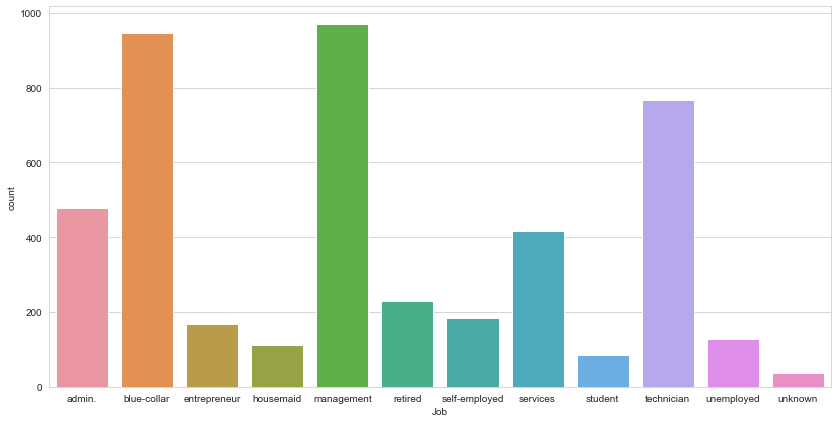

In [6]:
sns.set_style('whitegrid')
plt.figure(figsize=(14,7))
sns.countplot(data['Job'])

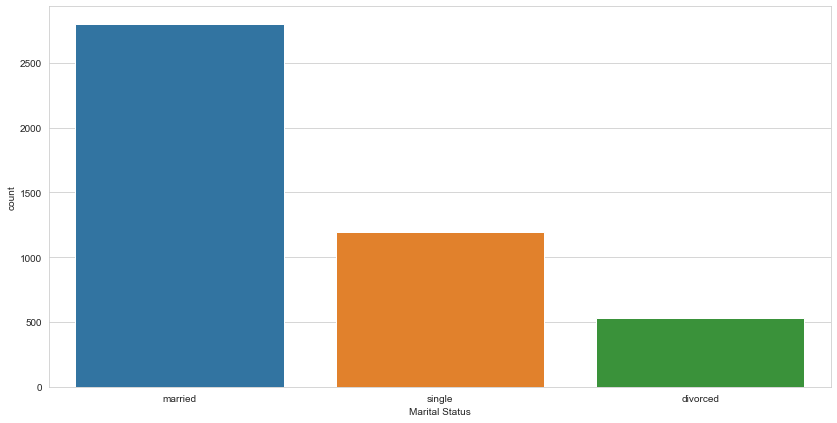

In [7]:
sns.set_style('whitegrid')
plt.figure(figsize=(14,7))
sns.countplot(data['Marital Status'])

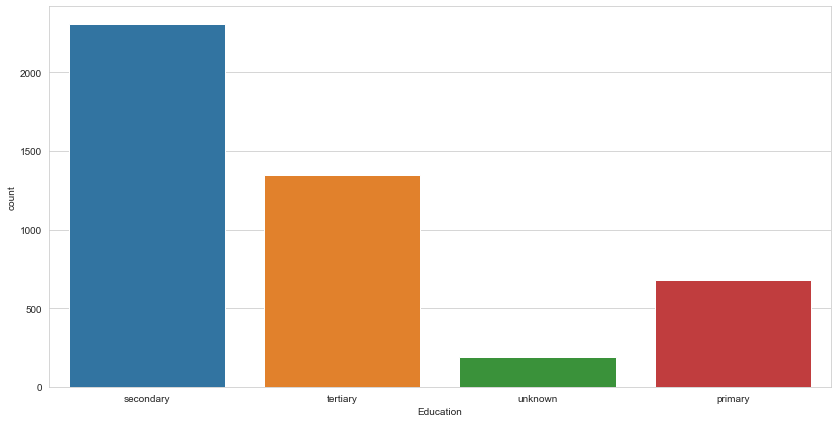

In [8]:
sns.set_style('whitegrid')
plt.figure(figsize=(14,7))
sns.countplot(data['Education'])

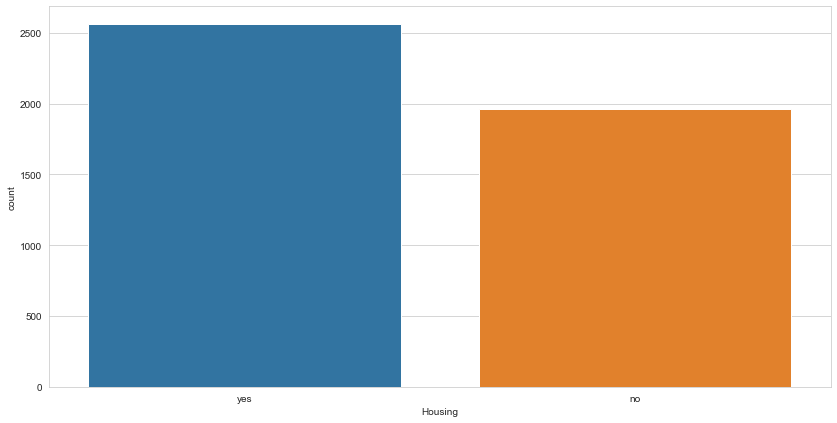

In [9]:
sns.set_style('whitegrid')
plt.figure(figsize=(14,7))
sns.countplot(data['Housing'])

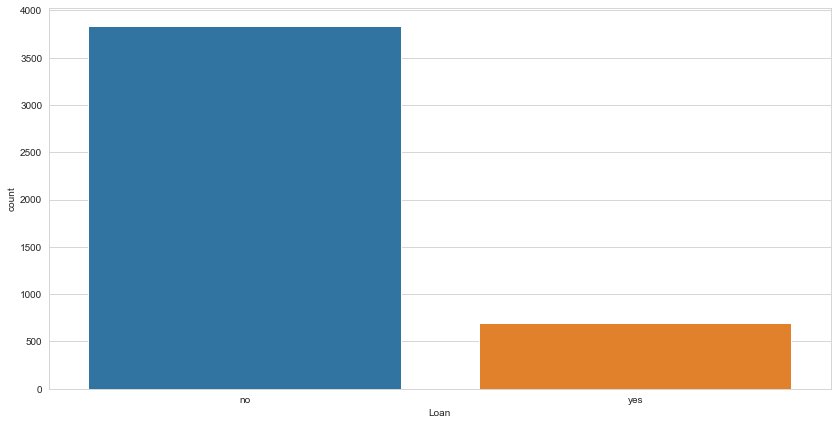

In [10]:
sns.set_style('whitegrid')
plt.figure(figsize=(14,7))
sns.countplot(data['Loan'])

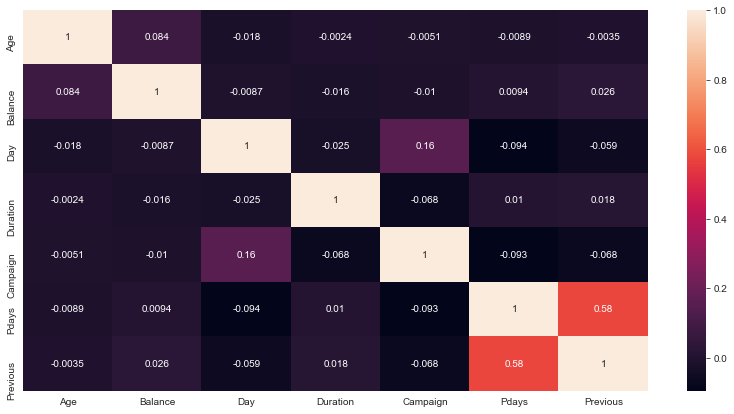

In [11]:
plt.figure(figsize=(14,7))
cor = data.corr()
sns.heatmap(cor, annot=True)
plt.show()

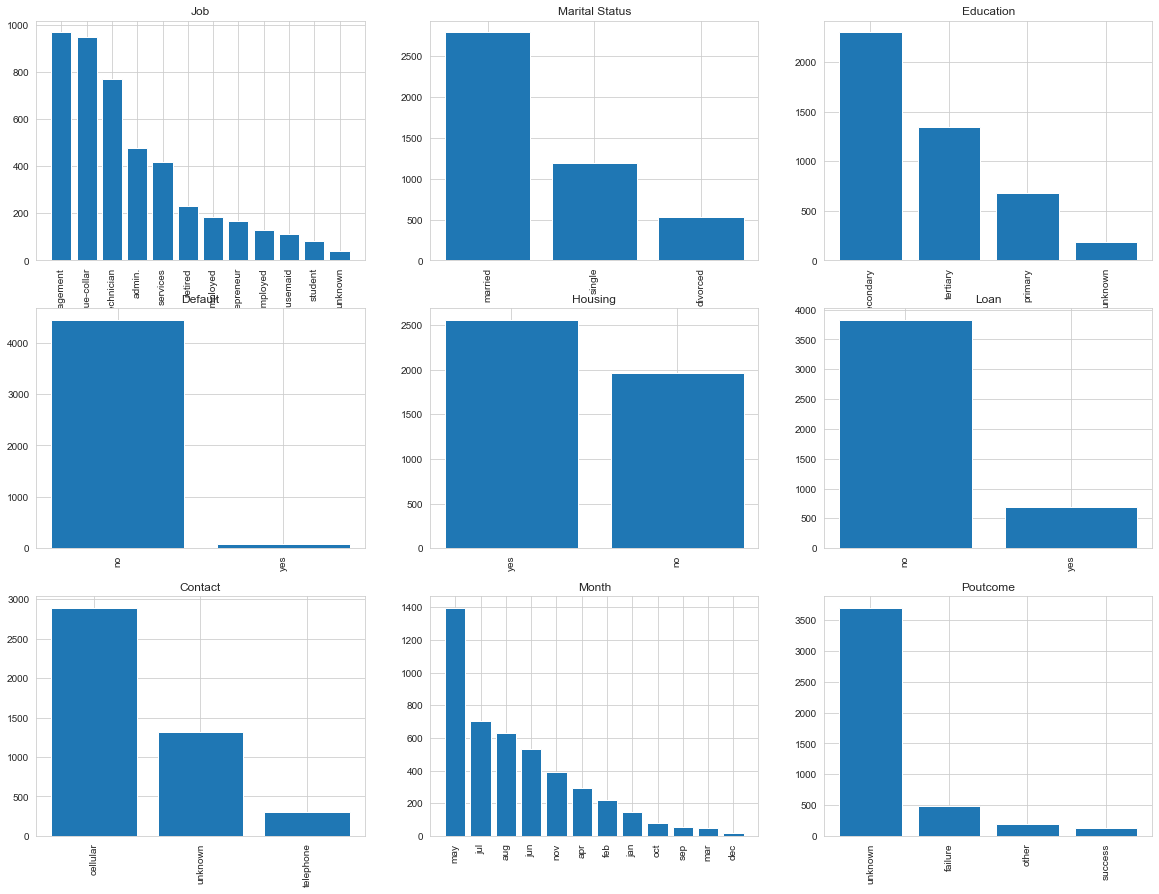

In [25]:
cat_columns = ['Job', 'Marital Status', 'Education', 'Default', 'Housing', 'Loan', 'Contact', 'Month','Poutcome']

fig, axs = plt.subplots(3, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for cat_column in cat_columns:
    value_counts = data[cat_column].value_counts()
    
    trace_x = counter // 3
    trace_y = counter % 3
    x_pos = np.arange(0, len(value_counts))
    
    axs[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label = value_counts.index)
    
    axs[trace_x, trace_y].set_title(cat_column)
    
    for tick in axs[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(90)
    
    counter += 1

plt.show()

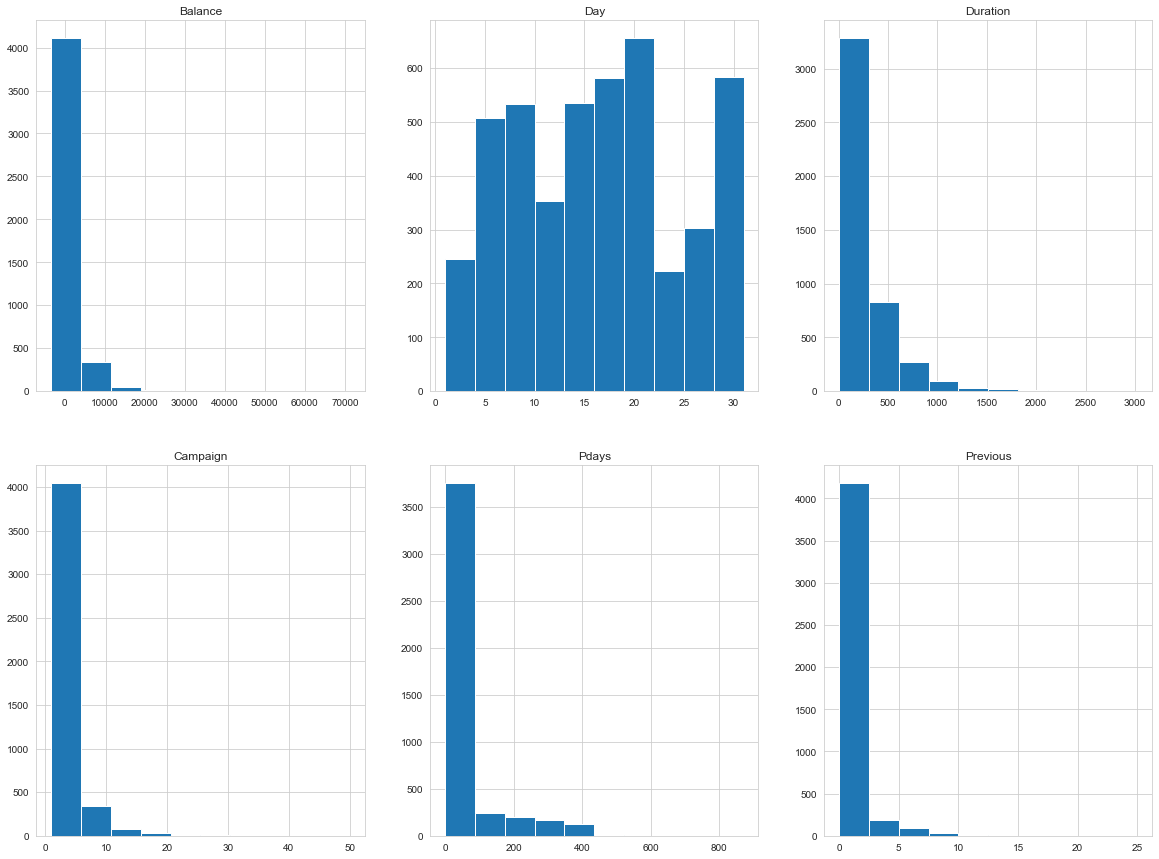

In [27]:
num_columns = ['Balance', 'Day','Duration', 'Campaign', 'Pdays', 'Previous']

fig, axs = plt.subplots(2, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for num_column in num_columns:
    
    trace_x = counter // 3
    trace_y = counter % 3
    
    axs[trace_x, trace_y].hist(data[num_column])
    
    axs[trace_x, trace_y].set_title(num_column)
    
    counter += 1

plt.show()

In [29]:
data[['Pdays', 'Campaign', 'Previous']].describe()

,Pdays,Campaign,Previous
count,4521.000000,4521.000000,4521.000000
mean,39.766645,2.793630,0.542579
std,100.121124,3.109807,1.693562
min,-1.000000,1.000000,0.000000
25%,-1.000000,1.000000,0.000000
50%,-1.000000,2.000000,0.000000
75%,-1.000000,3.000000,0.000000
max,871.000000,50.000000,25.000000


In [31]:
len (data[data['Pdays'] > 400] ) / len(data) * 100  # percentage of pdays values of above 400

0.57509400575094

In [33]:
len (data[data['Campaign'] > 34] ) / len(data) * 100

0.04423800044238001

In [34]:
len (data[data['Previous'] > 34] ) / len(data) * 100

0.0

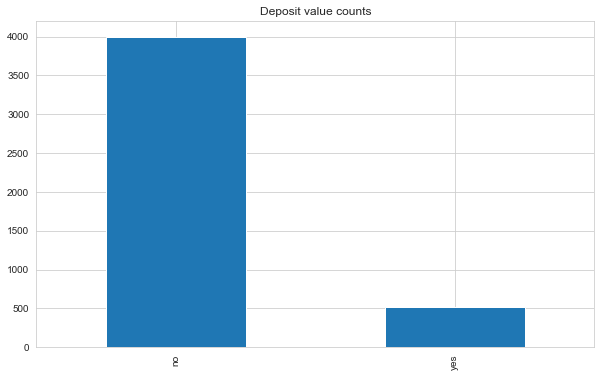

In [40]:
value_counts = data['y'].value_counts()

value_counts.plot.bar(title = 'Deposit value counts')

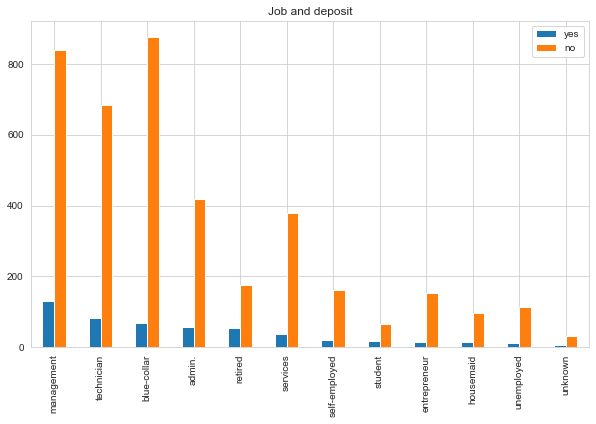

In [41]:
#job and deposit
j_df = pd.DataFrame()

j_df['yes'] = data[data['y'] == 'yes']['Job'].value_counts()
j_df['no'] = data[data['y'] == 'no']['Job'].value_counts()

j_df.plot.bar(title = 'Job and deposit')

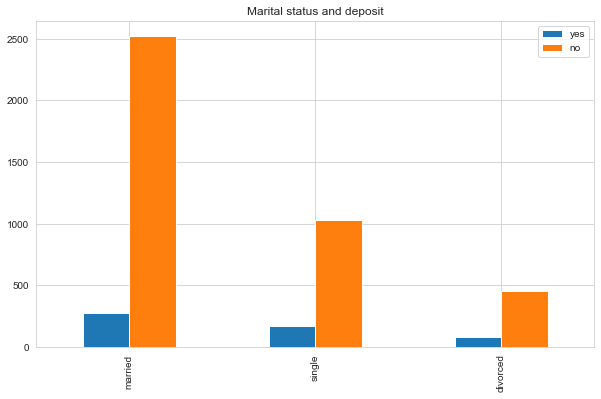

In [43]:
#Marital status and deposit
j_df = pd.DataFrame()

j_df['yes'] = data[data['y'] == 'yes']['Marital Status'].value_counts()
j_df['no'] = data[data['y'] == 'no']['Marital Status'].value_counts()

j_df.plot.bar(title = 'Marital status and deposit')

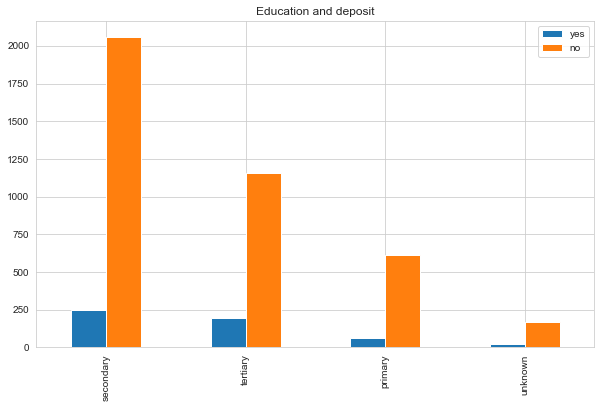

In [44]:
#Education and deposit
j_df = pd.DataFrame()

j_df['yes'] = data[data['y'] == 'yes']['Education'].value_counts()
j_df['no'] = data[data['y'] == 'no']['Education'].value_counts()

j_df.plot.bar(title = 'Education and deposit')

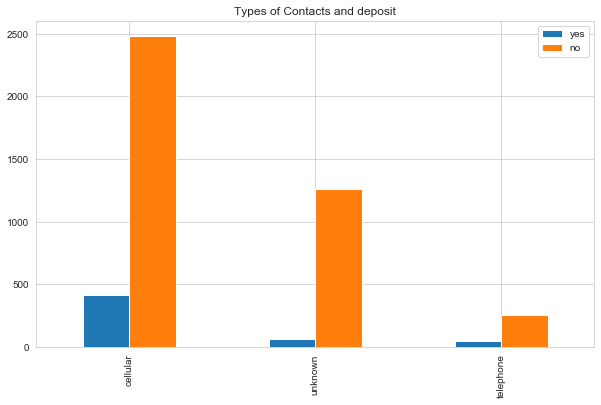

In [46]:
#Types of Contacts and deposit
j_df = pd.DataFrame()

j_df['yes'] = data[data['y'] == 'yes']['Contact'].value_counts()
j_df['no'] = data[data['y'] == 'no']['Contact'].value_counts()

j_df.plot.bar(title = 'Types of Contacts and deposit')

In [48]:
#balance and deposit

b_df = pd.DataFrame()
b_df['balance_yes'] = (data[data['y'] == 'yes'][['y','Balance']].describe())['Balance']
b_df['balance_no'] = (data[data['y'] == 'no'][['y','Balance']].describe())['Balance']

b_df

,balance_yes,balance_no
count,521.000000,4000.000000
mean,1571.955854,1403.211750
std,2444.398956,3075.349313
min,-1206.000000,-3313.000000
25%,171.000000,61.000000
50%,710.000000,419.500000
75%,2160.000000,1407.000000
max,26965.000000,71188.000000


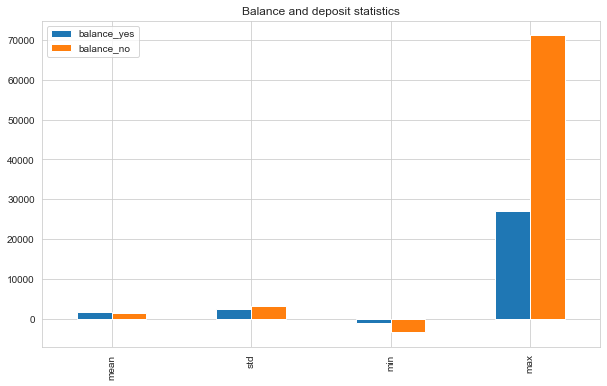

In [49]:
b_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Balance and deposit statistics')

In [50]:
#age and deposit

a_df = pd.DataFrame()
a_df['age_yes'] = (data[data['y'] == 'yes'][['y','Age']].describe())['Age']
a_df['age_no'] = (data[data['y'] == 'no'][['y','Age']].describe())['Age']

a_df

,age_yes,age_no
count,521.000000,4000.000000
mean,42.491363,40.998000
std,13.115772,10.188398
min,19.000000,19.000000
25%,32.000000,33.000000
50%,40.000000,39.000000
75%,50.000000,48.000000
max,87.000000,86.000000


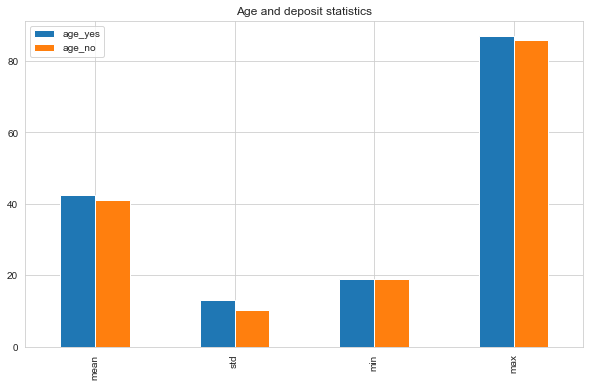

In [51]:
a_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Age and deposit statistics')

In [52]:
#number of contacts performed during this campaign ('campaign') and deposit
c_df = pd.DataFrame()
c_df['campaign_yes'] = (data[data['y'] == 'yes'][['y','Campaign']].describe())['Campaign']
c_df['campaign_no'] = (data[data['y'] == 'no'][['y','Campaign']].describe())['Campaign']

c_df

,campaign_yes,campaign_no
count,521.000000,4000.000000
mean,2.266795,2.862250
std,2.092071,3.212609
min,1.000000,1.000000
25%,1.000000,1.000000
50%,2.000000,2.000000
75%,3.000000,3.000000
max,24.000000,50.000000


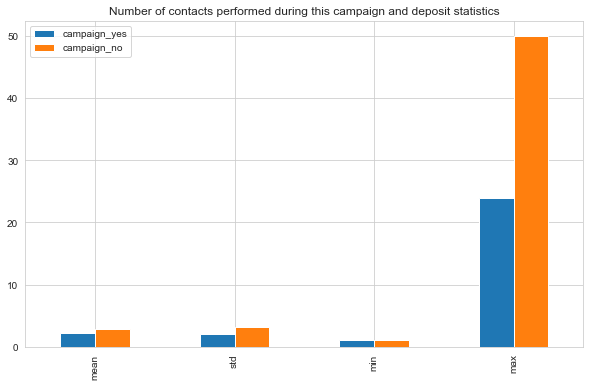

In [53]:
c_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Number of contacts performed during this campaign and deposit statistics')

In [54]:
#number of contacts performed during previous campaign ('previous') and deposit
p_df = pd.DataFrame()
p_df['previous_yes'] = (data[data['y'] == 'yes'][['y','Campaign']].describe())['Campaign']
p_df['previous_no'] = (data[data['y'] == 'no'][['y','Campaign']].describe())['Campaign']

p_df

,previous_yes,previous_no
count,521.000000,4000.000000
mean,2.266795,2.862250
std,2.092071,3.212609
min,1.000000,1.000000
25%,1.000000,1.000000
50%,2.000000,2.000000
75%,3.000000,3.000000
max,24.000000,50.000000


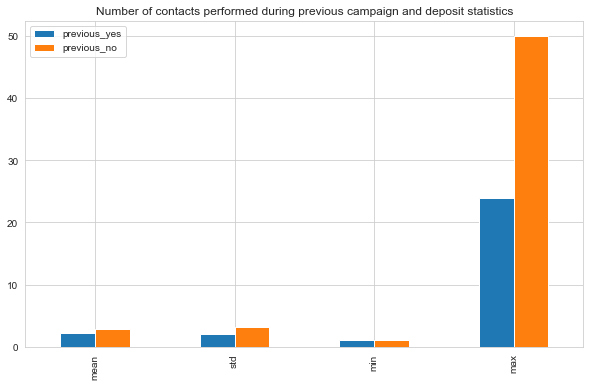

In [55]:
p_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Number of contacts performed during previous campaign and deposit statistics')